In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from pathlib import Path
#memanggil data set lewat gdrive
Path = "/content/gdrive/MyDrive/Praktikum_ML/Praktikum3Tugas/data"

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv(Path + '/day.csv', sep=',')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [15]:
X = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
Y = df['cnt']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=42 )

model = LinearRegression()
model.fit(X_train, Y_train)

print("R² Score :", model.score(X_test, Y_test))
print("Intercept:", model.intercept_)

R² Score : 0.8276670090367212
Intercept: 1248.3209284778172


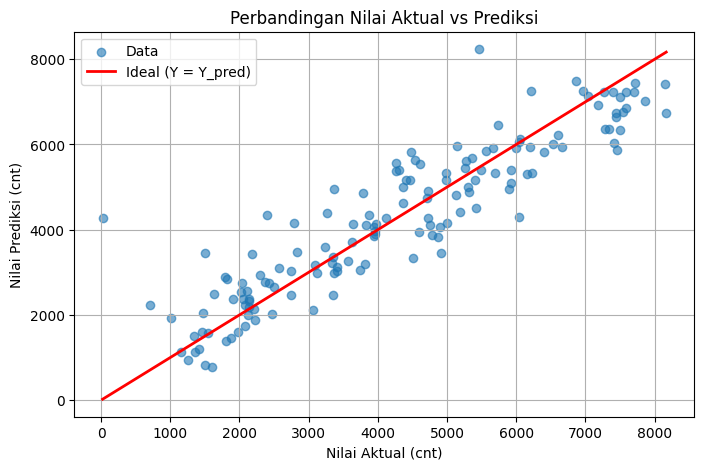

In [19]:
import matplotlib.pyplot as plt

# Prediksi data testing
Y_pred = model.predict(X_test)

# Buat grafik
plt.figure(figsize=(8,5))
plt.scatter(Y_test, Y_pred, alpha=0.6, label="Data")
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color='red', lw=2, label="Ideal (Y = Y_pred)")
plt.xlabel("Nilai Aktual (cnt)")
plt.ylabel("Nilai Prediksi (cnt)")
plt.title("Perbandingan Nilai Aktual vs Prediksi")
plt.legend()
plt.grid(True)
plt.show()